# TP3: Classification non-linéaire

**On commence par les importations nécessaires:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as sklv

## Exercice 1:

### 1)

La fonction suivante prend un nombre de $[-1;1]²$ et lui affecte le label 1 s'il correspond à une case noire du damier et 0 sinon

In [2]:
def label(x1,x2):
    if (-1<=x1<=-1/2):
        if (0<=x2<=1/2 or -1<=x2<=-1/2):
            return 1
        else: return -1
    else:
        if (-1/2<=x1<=0):
            if (1/2<=x2<=1 or -1/2<=x2<=0):
                return 1
            else:
                return -1
        else:
            if (0<=x1<=1/2):
                if (0<=x2<=1/2 or -1<=x2<=-1/2):
                    return 1
                else:
                    return -1
            else:
                if (1/2<=x2<=1 or -1/2<=x2<=0):
                    return 1
                else: return -1
            

Voici l'allure du damier qui est la forme qui nous intéresse:

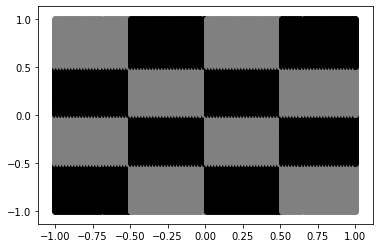

In [3]:
X1=np.linspace(-1,1,100)
X2=np.linspace(-1,1,100)
for x1 in X1:
    for x2 in X2:
        if label(x1,x2)==1:
            plt.scatter(x1,x2,color='k')
        else:
            plt.scatter(x1,x2,color='grey')
plt.show()

On peut maintenant générer un echantillon d'apprentissage et un echantillon de test pour notre futur modèle:

In [4]:
def echantillon(nbApp,nbTest):
    e=[]
    for i in range(nbApp+nbTest):
        U=2*np.random.uniform()-1
        V=2*np.random.uniform()-1
        y=label(U,V)
        e.append([U,V,y])
    e=np.array(e)
    app=e[:nbApp]
    test=e[nbApp:]
    X_train=app[:,:-1]
    Y_train=app[:,-1]
    X_test=test[:,:-1]
    Y_test=test[:,-1]
    return X_train,Y_train,X_test,Y_test

In [5]:
nbApp=300
nbTest=1000
X_train,Y_train,X_test,Y_test=echantillon(nbApp,nbTest)

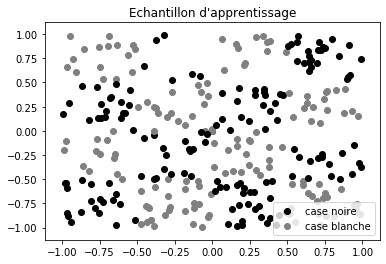

In [6]:
plt.scatter(0,0,color='k',label='case noire')
plt.scatter(0,0,color='grey',label='case blanche')
for k in range(nbApp):
    x1=X_train[k,0]
    x2=X_train[k,1]
    if Y_train[k]==1:
        plt.scatter(x1,x2,color='k')
    else:
        plt.scatter(x1,x2,color='grey')
plt.legend(loc='lower right' )
plt.title("Echantillon d'apprentissage")
plt.show()

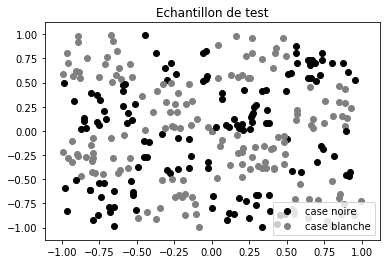

In [7]:
plt.scatter(0,0,color='k',label='case noire')
plt.scatter(0,0,color='grey',label='case blanche')
for k in range(nbApp):
    x1=X_test[k,0]
    x2=X_test[k,1]
    if Y_test[k]==1:
        plt.scatter(x1,x2,color='k')
    else:
        plt.scatter(x1,x2,color='grey')
plt.legend(loc='lower right')
plt.title("Echantillon de test")
plt.show()

### 2)

On effectue maintenant la transformation polynômiale des features:

In [8]:
def transform_echantillon(X,dPoly):
    n=X.shape[0]
    #print("n=",n)
    phi=[]
    l=(dPoly+1)*(dPoly+2)//2
    #print("l=",l)
    feat=np.zeros((n,l))
    for k in range(n):
        x1=X[k][0]
        x2=X[k][1]
        phi=[]
        for i in range(dPoly+1):            
            for j in range(dPoly+1-i):
                phi.append(x1**i*x2**j)
                #print("len(phi)=",len(phi))
            
        feat[k]=np.array(phi)
    #feat[:,-1]=X[:,-1]
    return feat[:,1:]

Le code suivant permet de vérifier sommairement la bonne implémentation de la fonction ci-dessus:

In [9]:
dPoly=2
X_train_transform=transform_echantillon(X_train,dPoly)
X_test_transform=transform_echantillon(X_test,dPoly)
x1,x2=X_train[0]
print(np.array([x2,x2**2,x1,x1*x2,x1**2])==X_train_transform[0])

[ True  True  True  True  True]


## 3)

On construit un modèle qui nous servira à classifier l'échantillon transformé par une SVM à noyau linéaire:

In [10]:
c=1
k='linear'
model_linear=sklv.SVC(C=c,kernel=k)

In [11]:
model_linear.fit(X_train_transform,Y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [12]:
model_linear.score(X_train_transform,Y_train)

0.5866666666666667

In [13]:
model_linear.score(X_test_transform,Y_test)

0.521

## 4)

On définit une fonction pour afficher les résultats obtenus par le modèle sur nos échantillons:

In [14]:
def plot_echantillon(X_train,Y_train,X_test,Y_test,k='linear',dPoly=2,c=1,g='scale'):
    
    X_train_transform=transform_echantillon(X_train,dPoly)
    X_test_transform=transform_echantillon(X_test,dPoly)
    
    model=sklv.SVC(C=c,kernel=k,gamma=g)
    model.fit(X_train_transform,Y_train)
    #legende
    plt.scatter(0,0,color='k',label='case noire')
    plt.scatter(0,0,color='grey',label='case blanche')
    plt.scatter(0,0,marker='s',label='mal appris')
    
    #echantillon d'apprentissage
    for k in range(nbApp):
        x1=X_train[k,0]
        x2=X_train[k,1]
        if Y_train[k]==1:
            plt.scatter(x1,x2,color='k')
        else:
            plt.scatter(x1,x2,color='grey')
        if Y_train[k]!=model.predict(X_train_transform)[k]:
            plt.scatter(x1,x2,marker='s',color='b')
    plt.legend(loc='lower right' )
    plt.title("Echantillon d'apprentissage")
    plt.show()
    print("Risque empirique: ",1-model.score(X_train_transform,Y_train))
    
    #legende
    plt.scatter(0,0,color='k',label='case noire')
    plt.scatter(0,0,color='grey',label='case blanche')
    plt.scatter(0,0,marker='s',label='mal prédit',color='b')
    
    #echantillon de test
    for k in range(nbApp):
        x1=X_test[k,0]
        x2=X_test[k,1]
        if Y_test[k]==1:
            plt.scatter(x1,x2,color='k')
        else:
            plt.scatter(x1,x2,color='grey')
        if (Y_test[k]!=model.predict(X_test_transform)[k] and Y_test[k]==1):
            plt.scatter(x1,x2,marker='s',color='b')
    plt.legend(loc='lower right' )
    plt.title("Echantillon de test")
    plt.show()
    print("Risque: ",1-model.score(X_test_transform,Y_test))

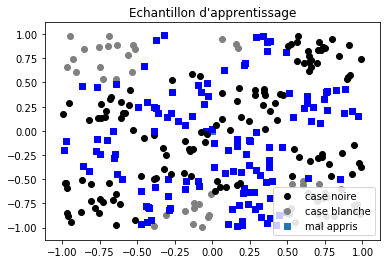

Risque empirique:  0.41333333333333333


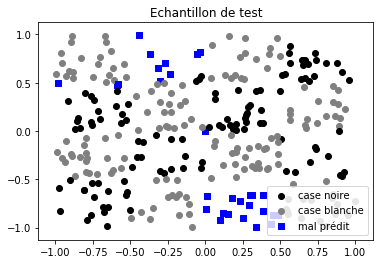

Risque:  0.479


In [15]:
plot_echantillon(X_train,Y_train,X_test,Y_test)

## 5)

On affiche les courbes d'apprentissage en fonction de C pour dPoly=5

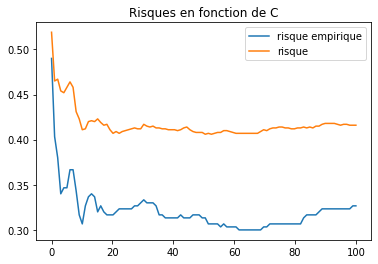

In [16]:
dPoly=5
X_train_transform=transform_echantillon(X_train,dPoly)
X_test_transform=transform_echantillon(X_test,dPoly)
liste_c=np.linspace(0.001,100,100)
risque_empirique=[]
risque=[]
for c in liste_c:
    k='linear'
    model=sklv.SVC(C=c,kernel=k)
    model.fit(X_train_transform,Y_train)
    risque_empirique.append(1-model.score(X_train_transform,Y_train))
    risque.append(1-model.score(X_test_transform,Y_test))
plt.plot(liste_c,risque_empirique,label='risque empirique')
plt.plot(liste_c,risque,label='risque')
plt.legend()
plt.title("Risques en fonction de C")
plt.show()

## 6)

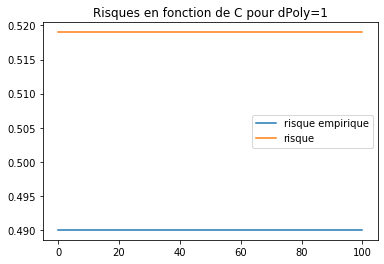

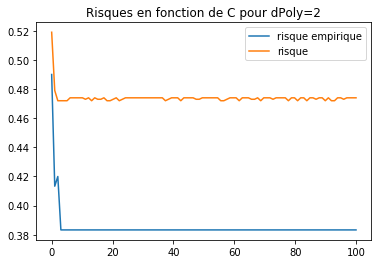

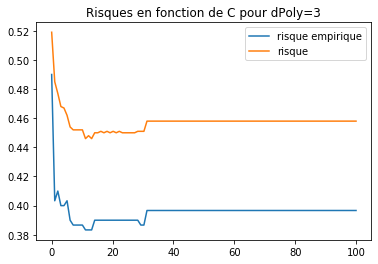

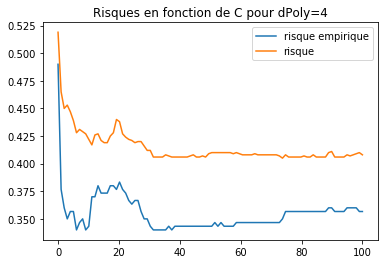

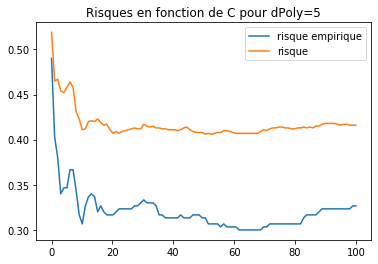

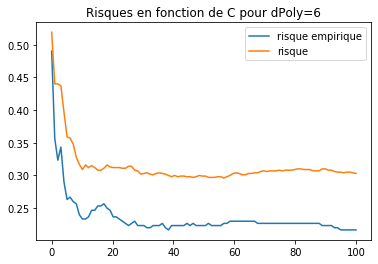

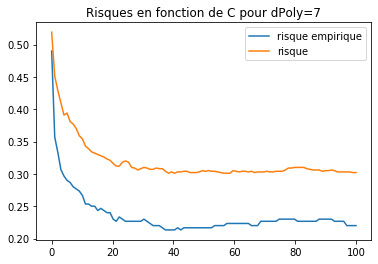

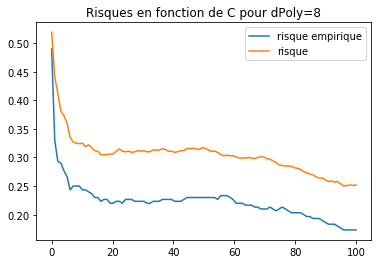

In [17]:
best_risque=2
best_c=-1
best_p=-1
for dPoly in range(1,9):
    X_train_transform=transform_echantillon(X_train,dPoly)
    X_test_transform=transform_echantillon(X_test,dPoly)
    liste_c=np.linspace(0.001,100,100)
    risque_empirique=[]
    risque=[]
    for c in liste_c:
        k='linear'
        model=sklv.SVC(C=c,kernel=k)
        model.fit(X_train_transform,Y_train)
        risque_empirique.append(1-model.score(X_train_transform,Y_train))
        
        risque.append(1-model.score(X_test_transform,Y_test))
        if (1-model.score(X_test_transform,Y_test))<best_risque:
            best_risque=1-model.score(X_test_transform,Y_test)
            best_c=c
            best_p=dPoly
    plt.plot(liste_c,risque_empirique,label='risque empirique')
    plt.plot(liste_c,risque,label='risque')
    plt.legend()
    plt.title("Risques en fonction de C pour dPoly="+str(dPoly))
    plt.show()

In [18]:
print("Les meilleures valeurs de p et c sont: p=",best_p," et c=",best_c)

Les meilleures valeurs de p et c sont: p= 8  et c= 95.95963636363638


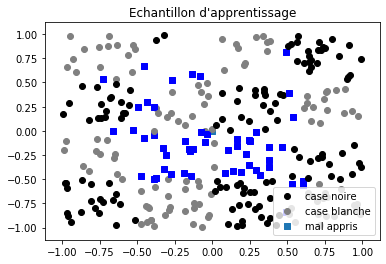

Risque empirique:  0.17333333333333334


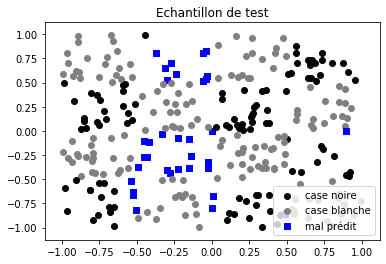

Risque:  0.25


In [19]:
plot_echantillon(X_train,Y_train,X_test,Y_test,dPoly=best_p,c=best_c)

## 7)

On effectue les mêmes opérations en remplaçant le noyau linéaire par un noyau gaussien pour la valeur de  dPoly optimale trouvée précédemment

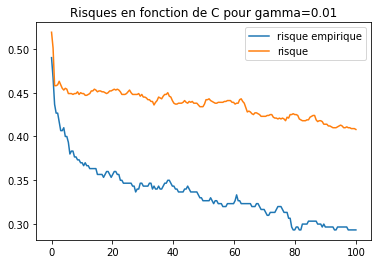

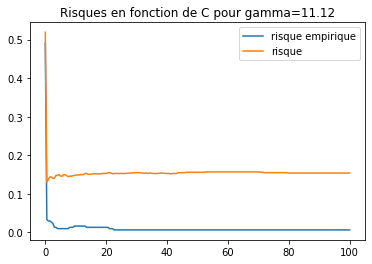

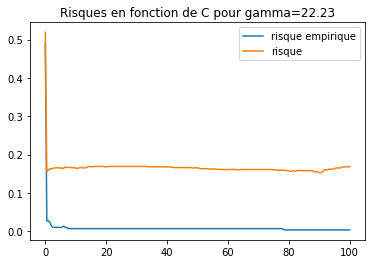

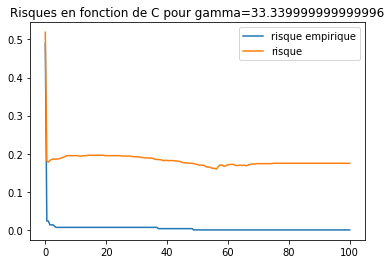

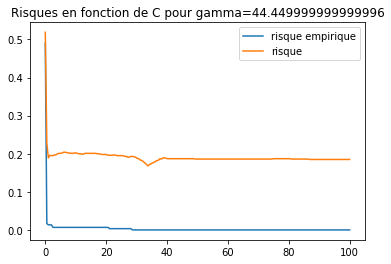

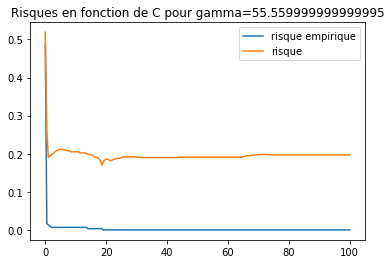

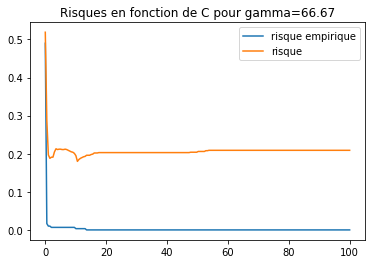

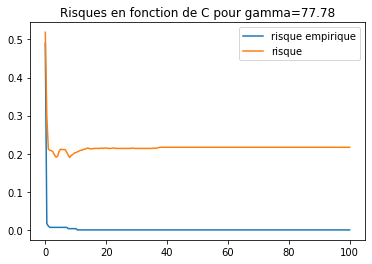

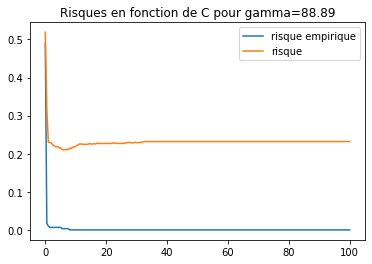

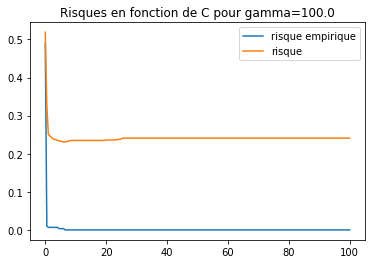

In [20]:
best_risque=2
dPoly=best_p

X_train_transform=transform_echantillon(X_train,dPoly)
X_test_transform=transform_echantillon(X_test,dPoly)
liste_c=np.linspace(0.001,100,200)
liste_g=np.linspace(0.01,100,10)
risque_empirique=[]
risque=[]
for g in liste_g:
    risque_empirique=[]
    risque=[]
    for c in liste_c:
        k='rbf'
        model=sklv.SVC(C=c,kernel=k,gamma=g)
        model.fit(X_train_transform,Y_train)
        risque_empirique.append(1-model.score(X_train_transform,Y_train))
        
        risque.append(1-model.score(X_test_transform,Y_test))
        if (1-model.score(X_test_transform,Y_test))<best_risque:
            best_risque=1-model.score(X_test_transform,Y_test)
            best_c=c
            best_g=g
    plt.plot(liste_c,risque_empirique,label='risque empirique')
    plt.plot(liste_c,risque,label='risque')
    plt.legend()
    plt.title("Risques en fonction de C pour gamma="+str(g))
    plt.show()

In [21]:
print("Les meilleures valeurs de g et c sont: g=",best_g," et c=",best_c)

Les meilleures valeurs de g et c sont: g= 11.12  et c= 0.5035075376884421


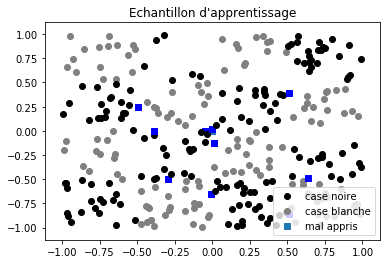

Risque empirique:  0.033333333333333326


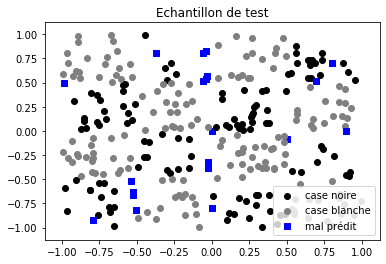

Risque:  0.13


In [22]:
plot_echantillon(X_train,Y_train,X_test,Y_test,k='rbf',dPoly=best_p,c=best_c,g=best_g)

# Exercice 2:

## 1)

In [23]:
def label2(x1,x2):
    if (50*x1**2+0.5*x2**2-1)>=0:
        return 1
    else:
        return -1

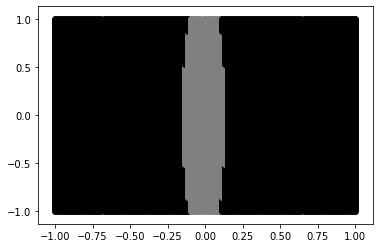

In [24]:
X1=np.linspace(-1,1,100)
X2=np.linspace(-1,1,100)
for x1 in X1:
    for x2 in X2:
        if label2(x1,x2)==1:
            plt.scatter(x1,x2,color='k')
        else:
            plt.scatter(x1,x2,color='grey')
plt.show()

In [35]:
def echantillon2(nbApp,nbTest):
    e=[]
    for i in range(nbApp+nbTest):
        U=2*np.random.uniform()-1
        V=2*np.random.uniform()-1
        y=label2(U,V)
        e.append([U,V,y])
    e=np.array(e)
    app=e[:nbApp]
    test=e[nbApp:]
    X_train=app[:,:-1]
    Y_train=app[:,-1]
    X_test=test[:,:-1]
    Y_test=test[:,-1]
    return X_train,Y_train,X_test,Y_test

In [36]:
nbApp=300
nbTest=1000
X_train2,Y_train2,X_test2,Y_test2=echantillon2(nbApp,nbTest)

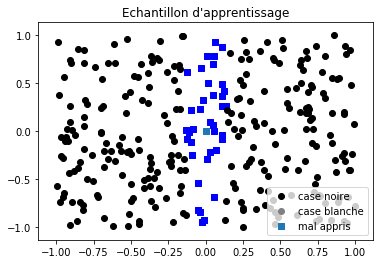

Risque empirique:  0.1233333333333333


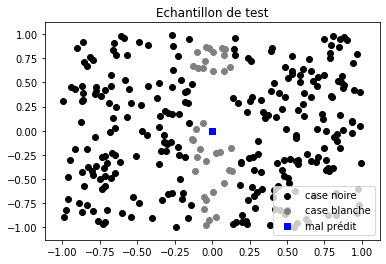

Risque:  0.11699999999999999


In [38]:
plot_echantillon(X_train2,Y_train2,X_test2,Y_test2,k='rbf',dPoly=8,c=1,g='scale')

# FIN

**Fait par Youness Khnjar M2MApI3**